In [25]:
import pandas as pd
import os

folder = 'aclImdb' # folder contains data

labels = {'pos': 1, 'neg': 0} # sentiment postive or negative. 

df = pd.DataFrame()

for f in ('test', 'train'):    
    for l in ('pos', 'neg'): # postive and negative data
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read() # read data from indivuale file
            df = df.append([[txt, labels[l]]],ignore_index=True) # append data to the dataframe

df.columns = ['review', 'sentiment']

In [33]:
#save data in csv file
df.to_csv('movie_data.csv', index=False, encoding='utf-8')
df.head()
print(len(df))

101


In [27]:

import nltk # import natural language tool kit for processing words
nltk.download('punkt')

from nltk.tokenize import word_tokenize

reviews = df.review.str.cat(sep=' ') # concat each review with separator ' '

tokens = word_tokenize(reviews) # split sting into words
vocabulary = set(tokens) # generate a list of unique words

print(len(reviews))

frequency_dist = nltk.FreqDist(tokens) # findout number of occurance of words
# sort the array in descending order
# providing a rough idea of the main topic in the text data
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

[nltk_data] Downloading package punkt to /home/yusuf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
120457


[',',
 'the',
 '.',
 'and',
 'a',
 'of',
 'to',
 '/',
 '<',
 'br',
 '>',
 'I',
 'in',
 'is',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The']

In [28]:
nltk.download('stopwords')
# remove stop words like the,this, of, ,, an, or, a etc
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words
tokens  = [w for w in tokens if not w in stop_words] 
#tokens

[nltk_data] Downloading package stopwords to /home/yusuf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


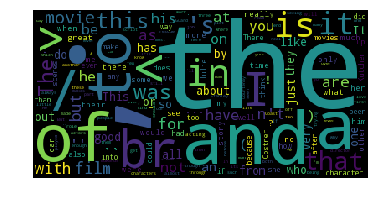

In [29]:
# import wordcloud for visualiz word in graph
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
X_train = df.loc[:50, 'review'].values
y_train = df.loc[:50, 'sentiment'].values
X_test = df.loc[51:, 'review'].values
y_test = df.loc[51:, 'sentiment'].values

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(51, 2703) (50, 2703)


In [42]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, y_train)

from  sklearn.metrics  import accuracy_score

predicted = clf.predict(test_vectors)

print(accuracy_score(y_test,predicted))

0.52
